<a href="https://colab.research.google.com/github/Hassan-jr/Deep-Learning/blob/main/01Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow Fundamentals

In [1]:
what_were_covering = {1: "data (prepare and load)",
2: "build model",
3: "fitting the model to data (training)",
4: "making predictions and evaluating a model (inference)",
5: "saving and loading a model",
6: "putting it all together"
}


## Data (Prepare and Load)

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# know parameters but the model will predict it
weight = 0.7
bias = 0.3 

x = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * x + bias # linear regreation formula
print(x[:10]),print(y[:10]), len(x),len(y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


(None, None, 50, 50)

In [3]:
# split the data into testing(20%) and training (80%)
split = int(0.8 * len(x))

x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

len(x_train), len(x_test), len(y_train), len(y_test)


(40, 10, 40, 10)

In [4]:
# visualize



def plotGraph(x_data=x_train,
              x_label = y_train,
              test_data = x_test,
              test_label = y_test,
              prediction = None):
  # PLOT THE GRAPH
  plt.figure(figsize=(10,7))
  # TRAING
  plt.scatter(x_data, x_label, c='b', s=4, label="Train Data")
  # TEST
  plt.scatter(test_data, test_label, c='g', s=4, label="Test Data")

  #prediction
  if prediction is not None:
   plt.scatter(test_data, prediction, c="r", s=4, lable="Prediction")

  #show the legend
  plt.legend(prop={"size": 14})


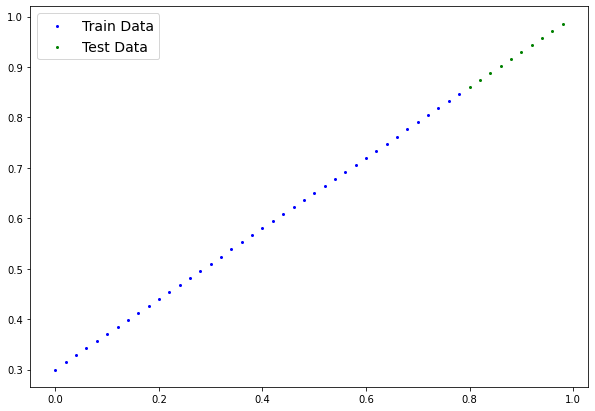

In [5]:
plotGraph()

## Build Model

In [112]:
# Build a linear Regression Model
class linearRegressionModel(nn.Module):
 def __init__(self):
   super().__init__()
   self.weight = nn.Parameter(torch.randn(1,
                                     dtype=torch.float32,
                                     requires_grad=True))
   self.bias =  nn.Parameter(torch.randn(1,
                                     dtype=torch.float32,
                                     requires_grad=True))
   
 def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weight * X + self.bias

In [113]:
# check the content of the model 
torch.manual_seed(42)
model_0 = linearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.inference_mode()

In [114]:
with torch.inference_mode():
  y_preds =model_0(x_test)



y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [115]:

def plot_prediction (x,y):
   plt.figure(figsize=(10,7))
   #data
   plt.scatter(x_train, y_train, c='b', s=4, label="Train Data")
  # TEST
   plt.scatter(x_test, y_test, c='g', s=4, label="Test Data")
   #prediction
   plt.scatter(x, y, c='r', s=4, label="Predicton")
   #show the legend
   plt.legend(prop={"size": 14})

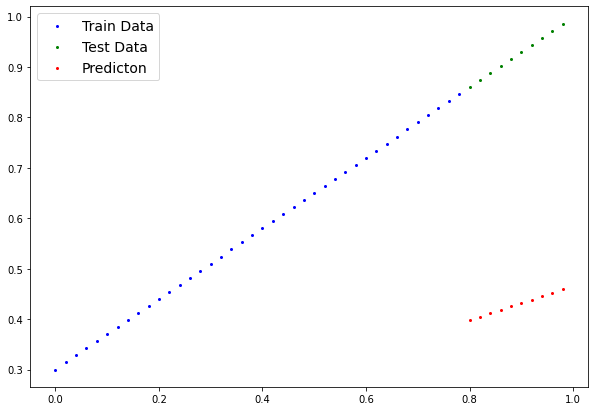

In [116]:
plot_prediction(x_test,y_preds)

## Train the Model

In [117]:
# prepaire a loss function and an optimizer ( gradient decent and backpropagation)
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)


In [118]:
#train
torch.manual_seed(42)

epochs = 200
epochs_count = []
train_loss_values = []
test_loss_values = []

#train with forloop
for epoch in range(epochs):
  #intialse train
  model_0.train()

  #1 forward pass
  y_preds=model_0(x_train)

  # 2. calculate loss function 
  loss = loss_fn(y_preds,y_train)

  # 3 zero the gradient to prevent it from accumulation
  optimizer.zero_grad()

  #4. back propergation
  loss.backward()

  # 5. optimize or make the change
  optimizer.step()

 ######################### testing ################################
  model_0.eval()

# time to test so diable gradient tracking
  with torch.inference_mode():
    #1. forward pass
    test_preds = model_0(x_test) # test_preds is the y_test_preds

    #2. calculate the loss
    test_loss = loss_fn(test_preds,y_test.type(torch.float))

    # print some useful information
    if epochs % 10 == 0:
      #keep track of the the epochs and loss both in train and test
      epochs_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"\n Epochs Count : {epochs} \n Train Loss : {loss} \n Test Loss : {test_loss}")



 Epochs Count : 200 
 Train Loss : 0.31288138031959534 
 Test Loss : 0.48106518387794495

 Epochs Count : 200 
 Train Loss : 0.3013603389263153 
 Test Loss : 0.4675942063331604

 Epochs Count : 200 
 Train Loss : 0.28983935713768005 
 Test Loss : 0.4541231691837311

 Epochs Count : 200 
 Train Loss : 0.2783183455467224 
 Test Loss : 0.44065219163894653

 Epochs Count : 200 
 Train Loss : 0.26679736375808716 
 Test Loss : 0.4271811842918396

 Epochs Count : 200 
 Train Loss : 0.2552763521671295 
 Test Loss : 0.41371020674705505

 Epochs Count : 200 
 Train Loss : 0.24375534057617188 
 Test Loss : 0.40023916959762573

 Epochs Count : 200 
 Train Loss : 0.23223432898521423 
 Test Loss : 0.3867681920528412

 Epochs Count : 200 
 Train Loss : 0.22071333229541779 
 Test Loss : 0.37329721450805664

 Epochs Count : 200 
 Train Loss : 0.20919232070446014 
 Test Loss : 0.3598262071609497

 Epochs Count : 200 
 Train Loss : 0.1976713240146637 
 Test Loss : 0.3463551998138428

 Epochs Count : 200

In [86]:
weight, bias

(0.7, 0.3)

In [119]:

list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True), Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [120]:
with torch.inference_mode():
  y_pred_new=model_0(x_test)

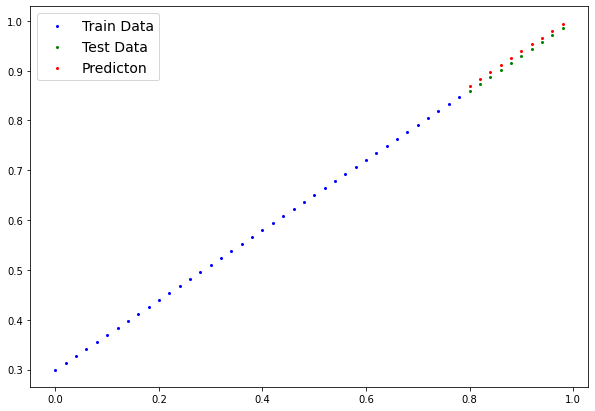

In [121]:
plot_prediction(x_test,y_pred_new)


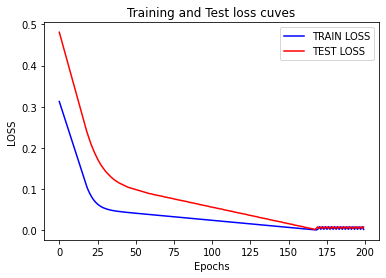

In [122]:
# plot the graph of the losses in train and test and the epoachs
plt.plot(epochs_count,train_loss_values, c='b',  label="TRAIN LOSS")
plt.plot(epochs_count,test_loss_values, c="r",  label="TEST LOSS")
plt.title("Training and Test loss cuves")
plt.ylabel("LOSS")
plt.xlabel("Epochs")
plt.legend()

